<b>Вопросы по теории (30%) </b>   

<b>Задача 1 Ответьте на вопросы: </b>

Как можно не прибегая к визуализации понять, что кластерная структура у данного облака точек отсутствует?

    Можно применить любой алгоритм кластеризации несколько раз. Если алгоритм каждый раз будет сходится к разным результатам, то вероятнее всего кластерная структура отсутствует.
    
Какие из алгоритмов кластеризации могут выделять кластеры с ленточной структурой? 

    Алгоритм выделения связных компонент
    Кратчайший незамкнутый путь
    ФОРЕЛ
    DBSCAN

Какие алгоритмы кластеризации чувствительны к шуму и перемычкам?

    Алгоритм выделения связных компонент
    Кратчайший незамкнутый путь
    Ланса-Уильямса

Каким образом приближают «центр кластера» в нелинейных пространствах?

    Пусть есть кластер $K$ и метрика $\rho(x, x')$, тогда центр можно определить так: $$x_{center} = arg\min\limits_{x\in K}\sum\limits_{x'\in K}\rho(x, x')$$
    
Каким образом можно определять число кластеров?

    Наличие кластерной структуры можно проверить с помощью статистики Хопкинса, количество кластеров с помощью коэффициента силуэта.


<b>Задача 2 Даны пять точек на числовой оси $X = (1; 5; 7; 8; 8)$, число кластеров равно 2. Рассчитайте ответ алгоритма K-means (финальные центры кластеров), если начальные центры кластеров c1 = 1, c2 = 10. </b> $$$$ После первого расчета получим: $y_1 = \{1, 5\}, y_2 = \{7, 8, 8\}, \mu_1 = 3, \mu_2 = 7\frac{1}{3}$ $$$$ После второго расчета: $y_1 = \{1, 5\}, y_2 = \{7, 8, 8\}, \mu_1 = 3, \mu_2 = 7\frac{1}{3}$ $$$$ Кластеризация не изменилась, поэтому алгоритм на этом и остановится.


<b>Практическое задание 1 (30%)</b>

Реализуйте PCA 

In [68]:
import numpy as np
import pylab as plt
%matplotlib inline

In [69]:
'''
Performs the Principal Coponent analysis of the Matrix F
Matrix must be n * l dimensions
where n is # features
l is # samples
'''

def PCA(F, varRetained = 0.95, show = False):
    # Input
    #     F - initaial matrix 
    # Compute Covariance Matrix Sigma
    # Input
    (n, l) = F.shape
    Sigma = 1.0 / l * F.dot(np.transpose(F))
    # Compute eigenvectors and eigenvalues of Sigma by SVD
    # U, V - matrix, d - array: Sigma = U * np.diag(d) * V
    U, d, V = np.linalg.svd(Sigma)# посчитать SVD матрицы Sigma

    # compute the value m: number of minumum features that retains the given variance varRetaine
    dTot = np.sum(d)
    var_i = np.array([np.sum(d[: i + 1]) / \
                dTot * 100.0 for i in range(n)])
    
    # Попробовал метод крутого склона - не получилось :(
    # print var_i[:-1] - var_i[1:]
    # m =  np.argmin(var_i[:-1] - var_i[1:]) # вычислите необходимое число главных компонент
    m = np.argmax(var_i > 100 * varRetained)
    print ('%.2f %% variance retained in %d dimensions' % (var_i[m], m)) #верните число m и точность, которая достигается при этом числе главных компонент

    # plot the variance plot
    if show:
        plt.plot(var_i)
        plt.xlabel('Number of Features')
        plt.ylabel(' Percentage Variance retained')
        plt.title('PCA $\% \sigma^2 $ vs # features')
        plt.show()

    # compute the reduced dimensional features by projection
    U_reduced = U[:m] #только m главных компонент
    G = U_reduced.dot(F) #вычислить матрицу в преобразованном пространстве

    return G, U_reduced

In [70]:
# Примените алгоритм к данным MNIST
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

95.25 % variance retained in 15 dimensions


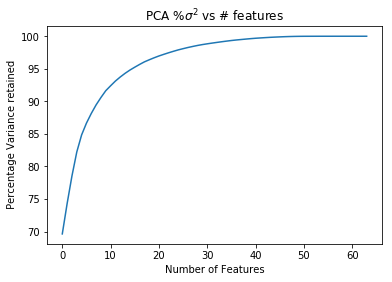

Performing PCA - Principal COmponent Analysis


In [71]:
#################################################################
# PCA of training set


Z, U_reduced = PCA(X.T, varRetained = 0.95, show = True)
print ('Performing PCA - Principal COmponent Analysis')

In [72]:
print (Z)
print (U_reduced)

[[  0.00000000e+00   1.00000000e+01   1.60000000e+01 ...,   6.00000000e+00
    1.20000000e+01   1.20000000e+01]
 [ -4.12262764e+00  -9.14308288e+00  -1.14155172e+01 ...,  -6.80163079e+00
   -5.68822182e+00  -5.65268685e+00]
 [ -4.14452856e+00   2.70430933e+00  -3.50320421e+00 ...,   4.67505995e-01
   -9.01156327e+00  -2.37711035e+00]
 ..., 
 [  7.76751944e+00  -5.53596107e+00   2.47524920e+00 ...,   7.79765516e+00
    5.95355820e+00   9.61797858e+00]
 [  8.96452321e+00  -1.08464694e-02   4.39337199e+00 ...,   3.12804013e+00
    8.72666154e+00   7.41659784e+00]
 [ -1.05451907e+00   1.97774069e+00   5.97688068e-01 ...,  -3.26128021e+00
   -1.64759809e+00  -3.31361018e+00]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.

<b>Практическое задание 2 (40%)</b>

<b>Изучение алгоритмов кластеризации на разных выборках</b>

<b>Кластеризация цифр с помощью dbscan</b>

На данных из sklearn.datasets.load_digits примените алгоритмы кластеризации (знания о метках классов при кластеризации использовать нельзя):

    dbscan запускайте при различных параметрах eps и minsamples, для всех экспериментов можете выбрать одну метрику (вспомните семинар про метрические алгоритмы);
    Используя метки классов цифр, оцените качество различных кластеризаций при помощи Adjusted Mutual Information и Adjusted Rand Index.
    визуалируйте изображения тех цифр, которые соответствуют core_points;
    визуалируйте изображения тех цифр, которые соответствуют выбросам;
    сделайте выводы и применимости алгоритмов.

<b>Уменьшение палитры изображения</b>

    для картинки нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселам изображения; после выделения кластеров, все пикселы, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.
    Попробуйте различные алгоритмы кластеризации:

     -- KMeans
     -- MeanShift
     -- AgglomerativeClustering

    Рассмотрите число кластеров K = 2, 3, 10, 20
    Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики SSIM. Какой способ оказался лучшим?



In [73]:
import numpy as np
import pylab as plt
from matplotlib import pyplot
from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
import itertools
from collections import Counter
import pylab

In [74]:
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

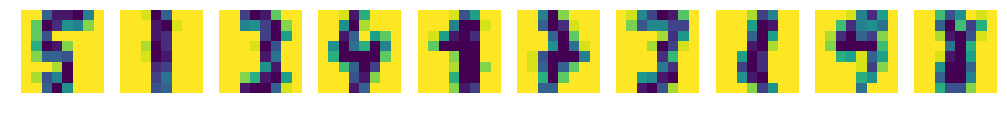

In [75]:
def plot_image(image_id, dataset=X_train, im_size=28):
    plt.imshow(255-dataset[image_id,:].reshape(im_size, im_size))
    
def plot_grid(image_ids, nrows, ncols, dataset=X_train, im_size=8):
    fig = pyplot.gcf()
    fig.set_size_inches(17.5,5)
    for pylab_index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, pylab_index + 1)
        plot_image(example_id, dataset, im_size)
        plt.axis('off')
    plt.show()
    
plot_grid(range(10), nrows=1, ncols=10)

In [76]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [77]:
clusters_pca = DBSCAN().fit(X_train_pca)
print (clusters_pca.labels_)

[-1 -1 -1 ..., -1 -1 -1]


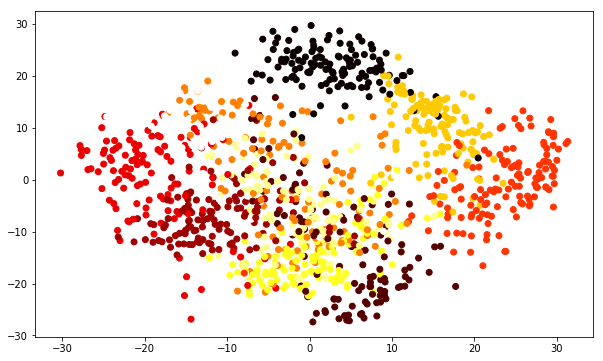

In [78]:
pyplot.figure(figsize=(10, 6))
pylab.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap=pyplot.cm.hot)
pylab.show()

In [79]:
tsne = TSNE(n_components=2, n_iter=200)
X_tsne = tsne.fit_transform(np.concatenate((X_train, X_test)))
X_train_tsne, X_test_tsne = X_tsne[:len(X_train)], X_tsne[len(X_train):]

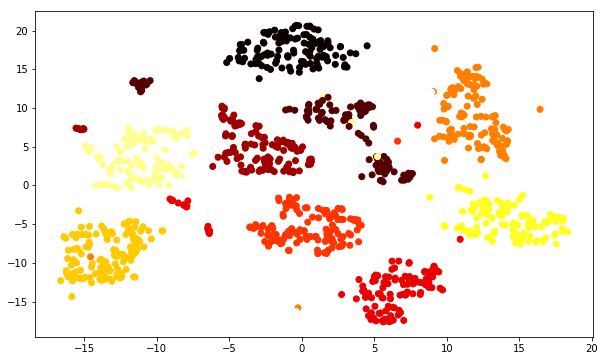

In [80]:
pyplot.figure(figsize=(10, 6))
pylab.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=Y_train, cmap=pyplot.cm.hot)
pylab.show()

Выберем следующую метрику для рассчёта аккуратности: Берём кластера из Y_train, смотрим, какой номер кластера чаще всего присваивался точкам их этой группы от DBSCAN, делаем соответствие между номерами кластеров на основании этого.

In [81]:
def validate_with_mappings(preds, target, labels):
    permutations = itertools.permutations(labels)
    result = []
    mapper = {-1: -1}
    for i in range(preds.max() + 1):
        new_labels = Y_train[preds == i]
        counter = Counter(new_labels)
        mapper[i] = max(counter, key=lambda x: counter[x])
    mapped_preds = [mapper[pred] for pred in preds]
#         print (float(sum(mapped_preds != target)) / len(target))
    return np.array(acc(mapped_preds, target))
# validate_with_mappings(preds, simple_dataset.target)

Посмотрим на аккуратность в зависимости от значений $\varepsilon$ и $minSamples$

In [82]:
for EPS in np.arange(2, 2.6, 0.02):
    clusters_pca = DBSCAN(eps=EPS).fit(X_train_tsne)
    labels = clusters_pca.labels_
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    print(EPS, len(unique_labels))

2.0 15
2.02 14
2.04 14
2.06 14
2.08 14
2.1 14
2.12 14
2.14 13
2.16 12
2.18 12
2.2 12
2.22 12
2.24 12
2.26 12
2.28 11
2.3 11
2.32 11
2.34 11
2.36 10
2.38 10
2.4 10
2.42 10
2.44 10
2.46 10
2.48 10
2.5 10
2.52 9
2.54 9
2.56 9
2.58 9
2.6 9


По количеству кластеров хорошо показывают себя $\varepsilon \approx 2.5$

In [83]:
for min_samples in np.arange(1, 30, 1):
    clusters_pca = DBSCAN(eps=2.3, min_samples=min_samples).fit(X_train_tsne)
    labels = clusters_pca.labels_
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    print(min_samples, np.max(validate_with_mappings(labels, Y_train, unique_labels)))

1 0.701670644391
2 0.699284009547
3 0.699284009547
4 0.699284009547
5 0.699284009547
6 0.794749403341
7 0.794749403341
8 0.789180588703
9 0.867939538584
10 0.867939538584
11 0.860779634049
12 0.859188544153
13 0.859188544153
14 0.859188544153
15 0.859188544153
16 0.859188544153
17 0.84645982498
18 0.930787589499
19 0.931583134447
20 0.929196499602
21 0.929196499602
22 0.929196499602
23 0.928400954654
24 0.928400954654
25 0.927605409706
26 0.927605409706
27 0.926809864757
28 0.926809864757
29 0.926014319809


Итого, лучшие значения для $(\varepsilon, minSamples) = \left( 2.2, 19\right)$
Визуализируем кластеризацию при данных значениях:

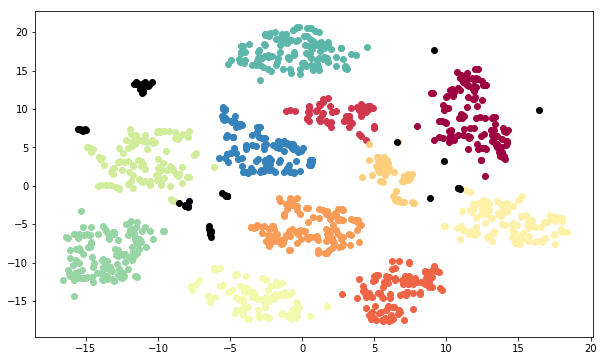

In [84]:
clusters_pca = DBSCAN(eps=2.2, min_samples=19).fit(X_train_tsne)
labels = clusters_pca.labels_
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

pyplot.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
    xy = X_train_tsne[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=col)
plt.show()

Помотрим на core_points:

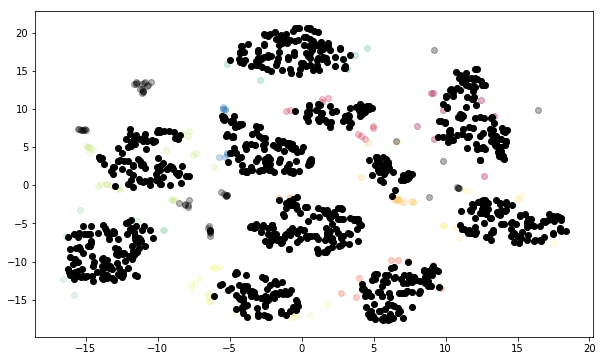

In [85]:
pyplot.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
    xy = X_train_tsne[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=col, alpha=0.3)
core_points = X_train_tsne[clusters_pca.core_sample_indices_]
plt.scatter(core_points[:, 0], core_points[:, 1], color='black')
plt.show()

Посмотрим на выбросы:

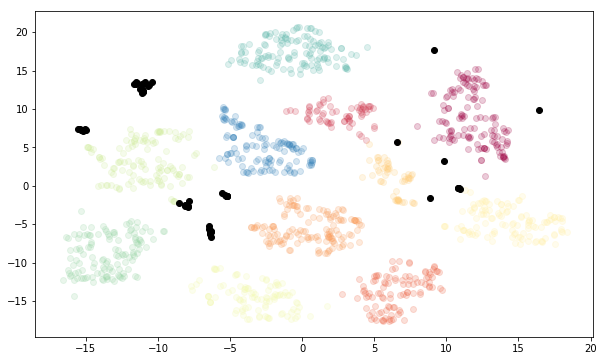

In [86]:
pyplot.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        alpha = 1
        col = 'k'
    else:
        alpha = 0.2
    class_member_mask = (labels == k)
    xy = X_train_tsne[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=col, alpha=alpha)
plt.show()

Визуализируем некоторые core_points:

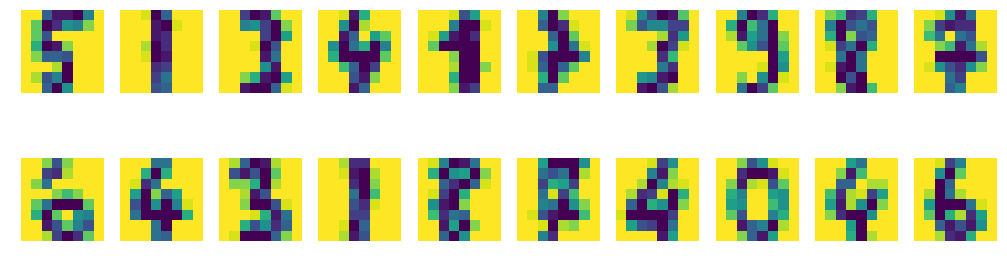

In [87]:
plot_grid(dataset=X_train[clusters_pca.core_sample_indices_], 
          image_ids=range(20), nrows=2, ncols=10)

Визуализируем некоторые выбросы:

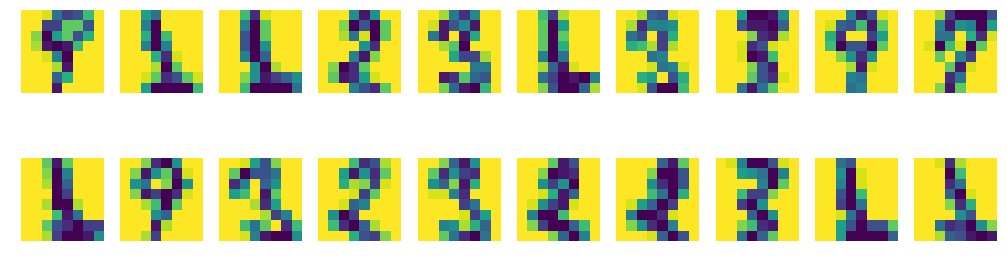

In [88]:
plot_grid(dataset=X_train[(labels == -1)],
          image_ids=range(20), nrows=2, ncols=10)

Как мы видим, в выбросах содержатся действительно достаточно криво написанные цифры.